In [1]:
# Griffin Davis, The University of Texas at Dallas
# (C) 2022
# Data source:
# Chetty, Raj; Friedman, John; Hendren, Nathaniel; Jones, Maggie R.; Porter, Sonya R., 2022, 
# "Replication Data for: The Opportunity Atlas: Mapping the Childhood Roots of Social Mobility", 
# https://doi.org/10.7910/DVN/NKCQM1, Harvard Dataverse, V1, UNF:6:wwWmCZy1LUqtq02qHdCKFQ== [fileUNF] 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download data
!wget -nc https://personal.utdallas.edu/~gcd/data/tract_merged.csv
ds = pd.read_csv('tract_merged.csv')

# Move ID column to be first
move_col = ds.pop('id')
ds.insert(0, 'id', move_col)
ds

File ‘tract_merged.csv’ already there; not retrieving.



,id,state,county,tract,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2000,frac_coll_plus2010,...,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013,kfr_pooled_pooled_p1,kfr_pooled_pooled_p25,kfr_pooled_pooled_p50,kfr_pooled_pooled_p75,kfr_pooled_pooled_p100
0,10140100,10.0,1.0,40100.0,19901.0,Dover,71843.773,31.317669,0.070473,0.142596,...,5278.0,2144.0,135.80400,-0.099002,4.484584,0.294553,0.382231,0.463751,0.541779,0.667231
1,10140201,10.0,1.0,40201.0,19901.0,Dover,63280.551,28.590240,0.135248,0.160841,...,8798.0,4423.0,1341.40500,0.026503,474.454500,0.348619,0.397189,0.442348,0.485573,0.555068
2,10140202,10.0,1.0,40202.0,19901.0,Dover,84746.133,29.360863,0.187897,0.216832,...,8547.0,4352.0,1034.86580,0.061946,270.737030,0.305575,0.394653,0.477475,0.556749,0.684203
3,10140203,10.0,1.0,40203.0,19901.0,Dover,59257.043,31.260509,0.066156,0.122530,...,8253.0,4201.0,218.82497,0.024916,132.594760,0.303139,0.386378,0.463772,0.537850,0.656951
4,10140501,10.0,1.0,40501.0,19901.0,Dover,67457.469,21.039738,0.179763,0.118082,...,33034.0,14197.0,1218.26280,-0.007737,1373.917400,0.237167,0.342951,0.441305,0.535446,0.686802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72185,99361200,9.0,9.0,361200.0,20901.0,Bridgeport,99803.031,24.892130,0.172909,0.176000,...,39422.0,17208.0,1476.61060,-0.009339,191.125370,0.481853,0.519970,0.555410,0.589332,0.643871
72186,99361300,9.0,9.0,361300.0,20901.0,Bridgeport,108548.270,25.945324,0.178973,0.215178,...,37905.0,19631.0,630.40240,0.004574,90.909088,0.317962,0.418287,0.511566,0.600849,0.744396
72187,99361401,9.0,9.0,361401.0,20901.0,Bridgeport,40031.734,17.189631,0.432571,0.793170,...,118165.0,69947.0,30079.26800,0.022942,7231.707000,0.507916,0.460390,0.416201,0.373905,0.305904
72188,99361402,9.0,9.0,361402.0,20901.0,Bridgeport,57140.156,11.354883,0.647059,0.775281,...,112799.0,67023.0,11298.65700,-0.281985,3050.335400,0.251330,0.422598,0.581838,0.734256,0.979310


In [21]:
ds.columns

Index(['id', 'state', 'county', 'tract', 'cz', 'czname', 'hhinc_mean2000',
       'mean_commutetime2000', 'frac_coll_plus2000', 'frac_coll_plus2010',
       'foreign_share2010', 'med_hhinc1990', 'med_hhinc2016', 'popdensity2000',
       'poor_share2010', 'poor_share2000', 'poor_share1990', 'share_white2010',
       'share_black2010', 'share_hisp2010', 'share_asian2010',
       'share_black2000', 'share_white2000', 'share_hisp2000',
       'share_asian2000', 'gsmn_math_g3_2013', 'rent_twobed2015',
       'singleparent_share2010', 'singleparent_share1990',
       'singleparent_share2000', 'traveltime15_2010', 'emp2000',
       'mail_return_rate2010', 'ln_wage_growth_hs_grad', 'jobs_total_5mi_2015',
       'jobs_highpay_5mi_2015', 'popdensity2010',
       'ann_avg_job_growth_2004_2013', 'job_density_2013',
       'kfr_pooled_pooled_p1', 'kfr_pooled_pooled_p25',
       'kfr_pooled_pooled_p50', 'kfr_pooled_pooled_p75',
       'kfr_pooled_pooled_p100'],
      dtype='object')

In [22]:
# Get subset of columns
cols = ['id', 'hhinc_mean2000', 'mean_commutetime2000', 'frac_coll_plus2000', 'frac_coll_plus2010', 
        'med_hhinc1990', 'med_hhinc2016', 'popdensity2000', 'poor_share2010', 'poor_share2000', 
        'poor_share1990', 'gsmn_math_g3_2013', 'traveltime15_2010', 'emp2000', 'singleparent_share1990',
        'singleparent_share2010', 'singleparent_share2000', 
        'mail_return_rate2010', 'jobs_total_5mi_2015', 'jobs_highpay_5mi_2015', 
        'popdensity2010', 'job_density_2013', 'kfr_pooled_pooled_p1', 
        'kfr_pooled_pooled_p25', 'kfr_pooled_pooled_p50', 'kfr_pooled_pooled_p75', 'kfr_pooled_pooled_p100']

exluded = ['rent_twobed2015', 'ln_wage_growth_hs_grad', 'ann_avg_job_growth_2004_2013']

ds = ds[ds.columns[ds.columns.isin(cols)]]
# ds.to_csv('subset.csv', index=False)

# Remove nan TODO: workaround?
ds = ds.dropna()

In [23]:
from sklearn import tree

# Shuffle rows of dataframe
ds.sample(frac=1)
rows = ds.shape[0]

# 70/30 Train/Test Split
train = int(rows * .7)
test = rows - train

# Decision tree regression
X = ds.loc[:train,'hhinc_mean2000':'job_density_2013']
Y = ds.loc[:train, 'kfr_pooled_pooled_p25']

test_X = ds.loc[train+1:,'hhinc_mean2000':'job_density_2013']
test_Y = ds.loc[train+1:, 'kfr_pooled_pooled_p25']

In [24]:
md = tree.DecisionTreeRegressor(max_depth=2)
md = md.fit(X, Y)

predict_Y = md.predict(test_X)

# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y, predict_Y)

0.0026962049724828397

[Text(0.5, 0.8333333333333334, 'X[13] <= 0.32\nsquared_error = 0.005\nsamples = 48918\nvalue = 0.424'),
 Text(0.25, 0.5, 'X[13] <= 0.178\nsquared_error = 0.004\nsamples = 31519\nvalue = 0.454'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.004\nsamples = 11414\nvalue = 0.489'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.003\nsamples = 20105\nvalue = 0.434'),
 Text(0.75, 0.5, 'X[13] <= 0.533\nsquared_error = 0.003\nsamples = 17399\nvalue = 0.368'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.002\nsamples = 12010\nvalue = 0.387'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.002\nsamples = 5389\nvalue = 0.324')]

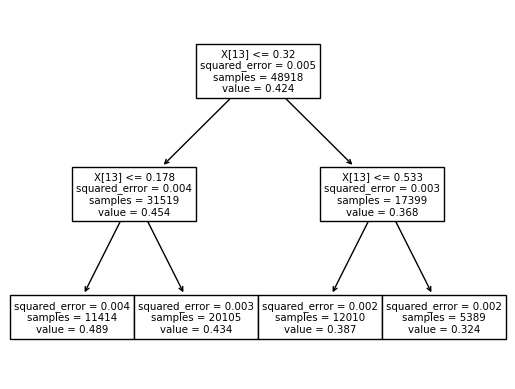

In [25]:
tree.plot_tree(md)

In [40]:
ds.columns[13]

'singleparent_share1990'

In [27]:
col2 = ['med_hhinc1990', 'singleparent_share1990']
ds2 = ds[ds.columns[ds.columns.isin(col2)]]
ds2

,med_hhinc1990,singleparent_share1990
0,28789.000000,0.129134
1,29026.000000,0.248865
2,29026.000000,0.248865
3,29026.000000,0.248865
4,36126.000000,0.222727
...,...,...
72185,51122.000000,0.167279
72186,51159.000000,0.160305
72187,17551.711628,0.684412
72188,16745.000000,0.654762


In [28]:
ds2.corr(method='spearman')

,med_hhinc1990,singleparent_share1990
med_hhinc1990,1.000000,-0.587349
singleparent_share1990,-0.587349,1.000000


In [29]:
# Decision tree regression
X = ds.loc[:train,'hhinc_mean2000':'job_density_2013']
X = (X-X.mean())/X.std()
Y = ds.loc[:train, 'kfr_pooled_pooled_p25']

test_X = ds.loc[train+1:,'hhinc_mean2000':'job_density_2013']
test_X = (test_X-test_X.mean())/test_X.std()
test_Y = ds.loc[train+1:, 'kfr_pooled_pooled_p25']

In [39]:
md = tree.DecisionTreeRegressor(max_depth=2)
md = md.fit(X, Y)

predict_Y = md.predict(test_X)

# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y, predict_Y)*len(test_Y)

65.38120333354809

[Text(0.5, 0.8333333333333334, 'X[13] <= 0.106\nsquared_error = 0.005\nsamples = 48918\nvalue = 0.424'),
 Text(0.25, 0.5, 'X[13] <= -0.746\nsquared_error = 0.004\nsamples = 31519\nvalue = 0.454'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.004\nsamples = 11414\nvalue = 0.489'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.003\nsamples = 20105\nvalue = 0.434'),
 Text(0.75, 0.5, 'X[13] <= 1.378\nsquared_error = 0.003\nsamples = 17399\nvalue = 0.368'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.002\nsamples = 12010\nvalue = 0.387'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.002\nsamples = 5389\nvalue = 0.324')]

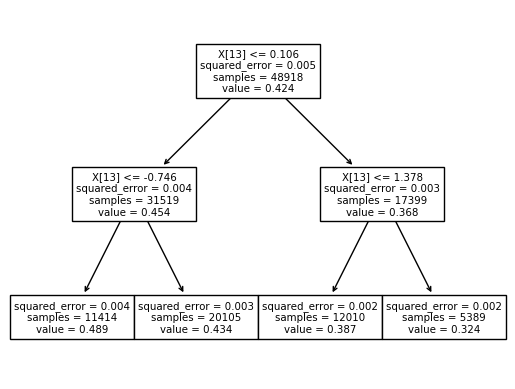

In [33]:
tree.plot_tree(md)

In [36]:
pd.Series(predict_Y)

0        0.434429
1        0.489230
2        0.387362
3        0.489230
4        0.489230
           ...   
21980    0.489230
21981    0.489230
21982    0.324335
21983    0.387362
21984    0.324335
Length: 21985, dtype: float64

In [37]:
pd.Series(test_Y)

49633    0.585916
49634    0.469082
49635    0.382515
49636    0.451026
49637    0.550458
           ...   
72185    0.519970
72186    0.418287
72187    0.460390
72188    0.422598
72189    0.380625
Name: kfr_pooled_pooled_p25, Length: 21985, dtype: float64

In [38]:
test_Y-predict_Y

49633    0.151487
49634   -0.020149
49635   -0.004847
49636   -0.038204
49637    0.061228
           ...   
72185    0.030740
72186   -0.070943
72187    0.136055
72188    0.035237
72189    0.056290
Name: kfr_pooled_pooled_p25, Length: 21985, dtype: float64